<a href="https://colab.research.google.com/github/pravallika16-in/firstRepo/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = 'drive/MyDrive/imgs/train'
valid_path = 'drive/MyDrive/imgs/validation'


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/imgs/train/*')
print(len(folders))

10


In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/imgs/train',
                                                 target_size = (224, 224),
                                                 batch_size = 180,
                                                 class_mode = 'categorical')

Found 17943 images belonging to 10 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/imgs/validation',
                                            target_size = (224, 224),
                                            batch_size = 180,
                                            class_mode = 'categorical')

Found 4481 images belonging to 10 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)

)
model.save('/content/drive/MyDrive/second.h5')

Epoch 1/5
100/100 [==============================] - 4961s 49s/step - loss: 1.7945 - accuracy: 0.5182 - val_loss: 0.2646 - val_accuracy: 0.9569
Epoch 2/5
100/100 [==============================] - 281s 3s/step - loss: 0.2797 - accuracy: 0.9541 - val_loss: 0.1424 - val_accuracy: 0.9699
Epoch 3/5
100/100 [==============================] - 282s 3s/step - loss: 0.1443 - accuracy: 0.9772 - val_loss: 0.0905 - val_accuracy: 0.9848
Epoch 4/5
100/100 [==============================] - 279s 3s/step - loss: 0.1063 - accuracy: 0.9833 - val_loss: 0.0684 - val_accuracy: 0.9875
Epoch 5/5
100/100 [==============================] - 284s 3s/step - loss: 0.0825 - accuracy: 0.9879 - val_loss: 0.0506 - val_accuracy: 0.9913


OSError: ignored

In [ ]:

model.save('/content/drive/MyDrive/second.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/second.model/assets


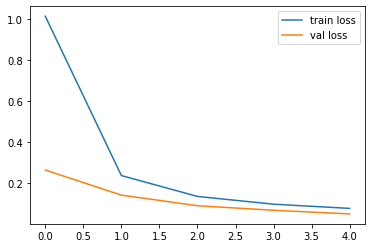

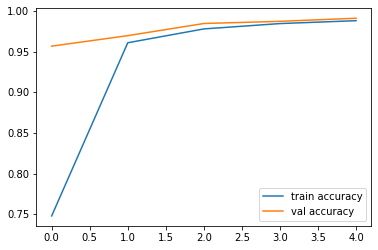

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

'c8'

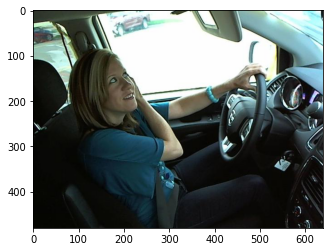

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = "/content/drive/MyDrive/images/test/img_1008.jpg"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = model.predict(test_img)
a = result.argmax()
s = training_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/second.model')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = "/content/drive/MyDrive/images/test/img_1008.jpg"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = model.predict(test_img)
a = result.argmax()
s = training_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p